In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
nba_data=pd.read_csv("all_seasons.csv")
nba_data

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [3]:
nba_data.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [4]:
nba_data.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [5]:
nba_data.dropna(inplace=True)  

# Remove duplicates
nba_data.drop_duplicates(inplace=True)

In [6]:
nba_data.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [7]:
nba_data.info

<bound method DataFrame.info of        Unnamed: 0       player_name team_abbreviation   age  player_height  \
0               0  Randy Livingston               HOU  22.0         193.04   
1               1  Gaylon Nickerson               WAS  28.0         190.50   
2               2      George Lynch               VAN  26.0         203.20   
3               3    George McCloud               LAL  30.0         203.20   
4               4      George Zidek               DEN  23.0         213.36   
...           ...               ...               ...   ...            ...   
12839       12839       Joel Embiid               PHI  29.0         213.36   
12840       12840   John Butler Jr.               POR  20.0         213.36   
12841       12841      John Collins               ATL  25.0         205.74   
12842       12842      Jericho Sims               NYK  24.0         208.28   
12843       12843    JaMychal Green               GSW  33.0         205.74   

       player_weight           

In [8]:
def plot_player_performance(player_name, dataset):
    """
    Plots points per game (pts) and assists per game (ast) over time for a specific player.
    """
    player_stats = dataset[['player_name', 'pts', 'ast', 'season']]

    
    player_data = player_stats[player_stats['player_name'] == player_name]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['season'], player_data['pts'], marker='o', label='Points per Game')
    plt.plot(player_data['season'], player_data['ast'], marker='o', label='Assists per Game')
    plt.title(f'{player_name} NBA Career: Points and Assists per Game')
    plt.xlabel('Season')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

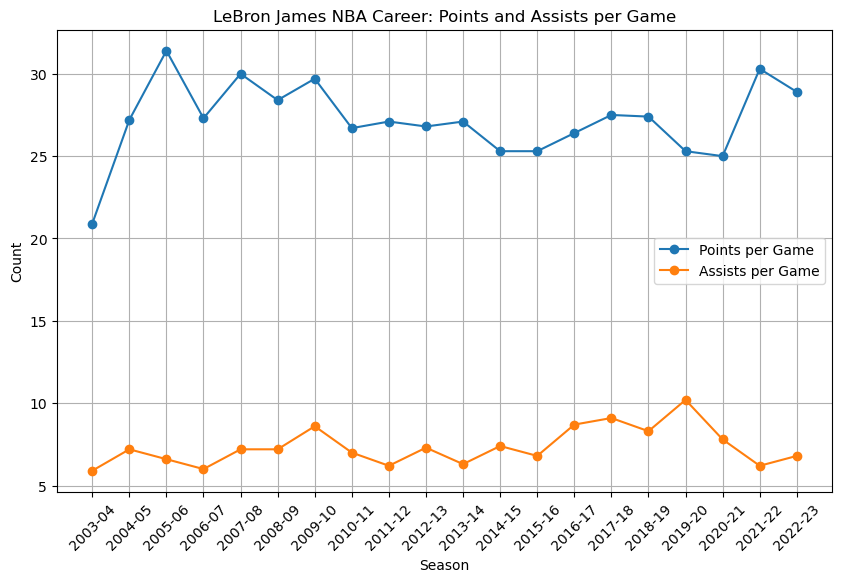

In [9]:
plot_player_performance('LeBron James', nba_data)

In [10]:
def plot_team_performance(season, dataset):
    """
    Plots average points per game (pts) and assists per game (ast) for different teams in a specific season..
    """
    team_stats = dataset[dataset['season'] == season][['team_abbreviation', 'pts', 'ast']]

    # Calculate average points and assists per game for each team
    avg_stats = team_stats.groupby('team_abbreviation').mean().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(avg_stats['team_abbreviation'], avg_stats['pts'], label='Average Points per Game', color='skyblue')
    plt.bar(avg_stats['team_abbreviation'], avg_stats['ast'], label='Average Assists per Game', color='lightgreen')
    plt.title(f'NBA Team Performance: Points and Assists per Game ({season})')
    plt.xlabel('Team')
    plt.ylabel('Average Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

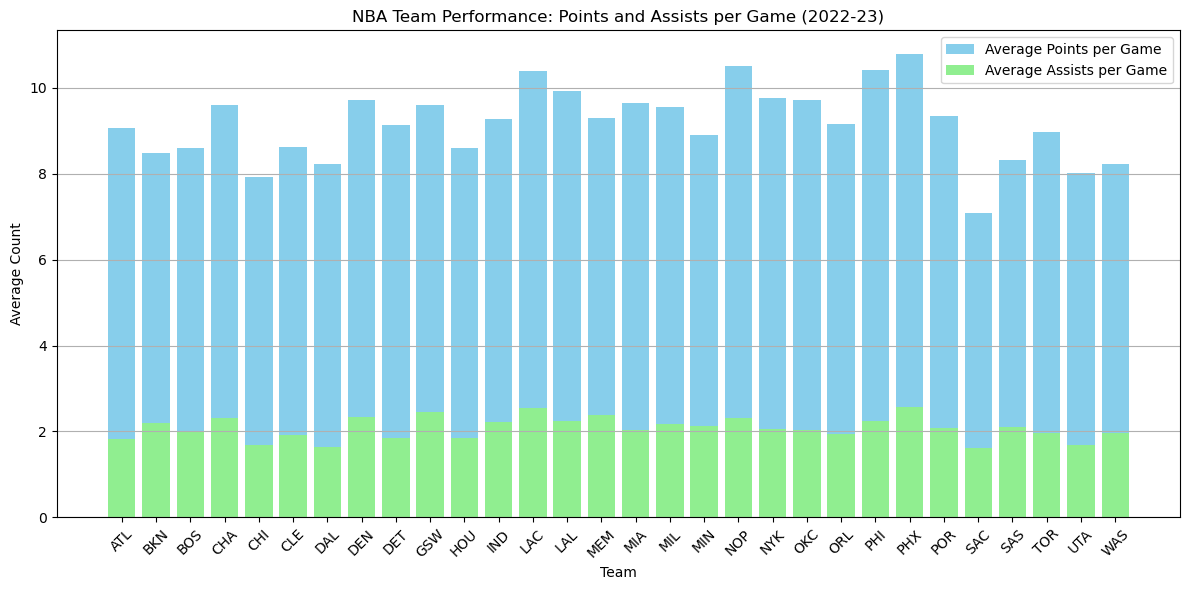

In [11]:
plot_team_performance('2022-23', nba_data)

In [54]:
def compare_players_stats(player_data, players, metric):
    """
    Compare stats of multiple players using box plots
    """
    # Filter player data for the specified metric and players
    player_metrics = [player_data[player_data['player_name'] == player][metric] for player in players]
    
    # plot a box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(player_metrics, labels=players)
    plt.title(f'Comparison of {metric.upper()} among Top Players')
    plt.ylabel(metric.upper())
    plt.grid(True)
    plt.show()

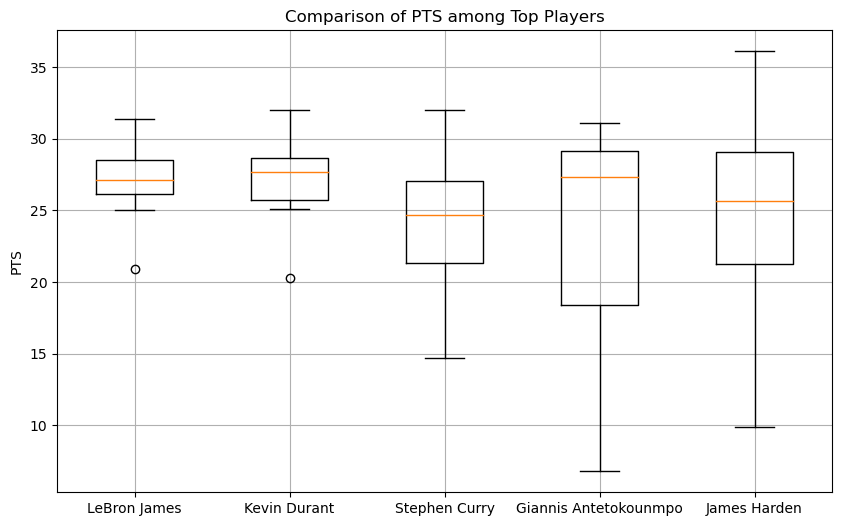

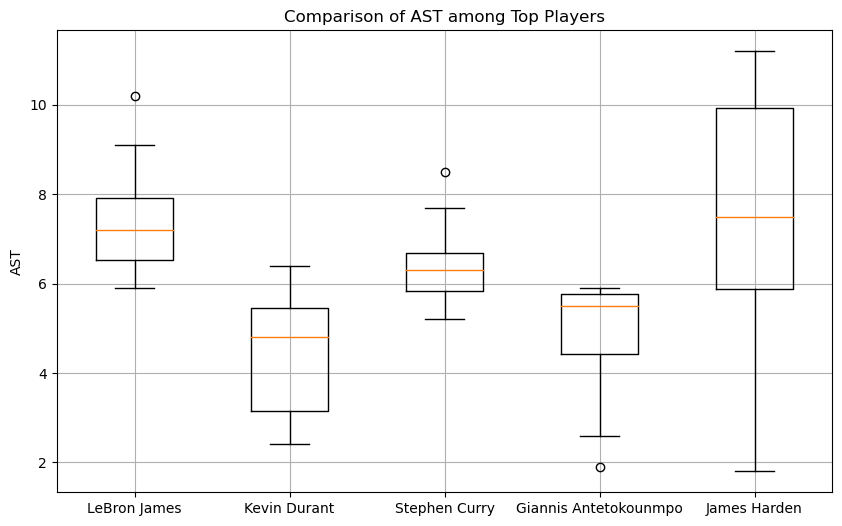

In [13]:
top_players = ['LeBron James', 'Kevin Durant', 'Stephen Curry', 'Giannis Antetokounmpo', 'James Harden']

# Compare points per game
compare_players_stats(nba_data, top_players, 'pts')

# Compare assists per game
compare_players_stats(nba_data, top_players, 'ast')

In [14]:
numeric_data = nba_data[['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]

In [15]:
def plot_statistical_relation(dataset):
    """
    Plots a correlation matrix communicating correlation between various aspects of the dataset.
    """
    # Correlation matrix
    corr_matrix = dataset.corr()
    plt.figure(figsize=(16, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

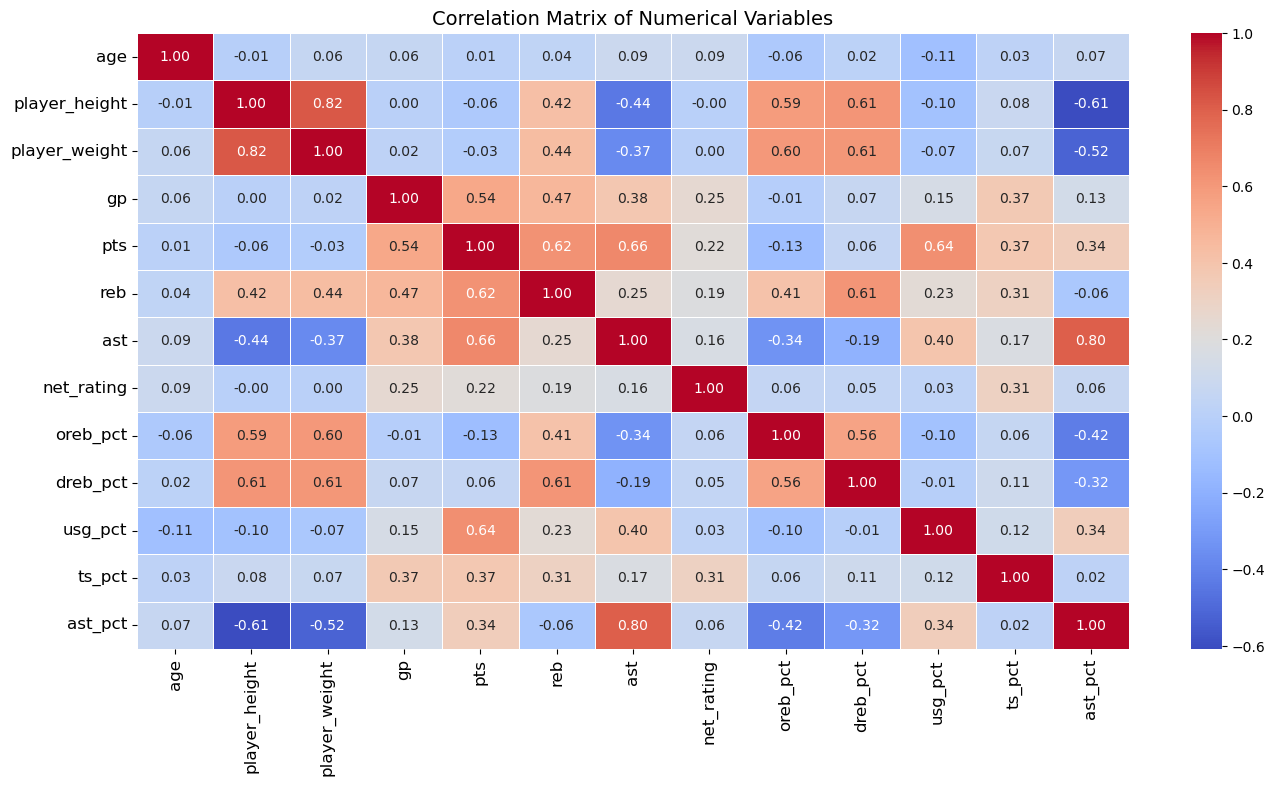

In [16]:
plot_statistical_relation(numeric_data)

In [17]:
def display_statistical_summary(dataset):
    """
    Displays a statistical summary including major moments, correlation matrix, and basic statistics.
    """
    # Calculate major moments
    moments = dataset.aggregate(['mean', 'median', 'std', 'skew', 'kurt'])

    # Descriptive statistics
    desc_stats = dataset.describe()

    # Print major moments
    print("Major Moments:")
    print(moments)
    print()

    # Print descriptive statistics
    print("Descriptive Statistics:")
    print(desc_stats)
    print()

In [18]:
display_statistical_summary(numeric_data)

Major Moments:
              age  player_height  player_weight         gp       pts  \
mean    27.045313     200.555097     100.263279  51.154158  8.212582   
median  26.000000     200.660000      99.790240  57.000000  6.700000   
std      4.339211       9.111090      12.426628  25.084904  6.016573   
skew     0.565495      -0.323197       0.189452  -0.532821  1.084318   
kurt    -0.230926      -0.182695      -0.117985  -0.994040  0.878160   

             reb       ast  net_rating   oreb_pct  dreb_pct   usg_pct  \
mean    3.558486  1.824681   -2.226339   0.054073  0.140646  0.184641   
median  3.000000  1.200000   -1.300000   0.040000  0.130500  0.181000   
std     2.477885  1.800840   12.665124   0.043335  0.062513  0.053545   
skew    1.290393  1.861202   -0.706912   2.341101  1.205774  0.818397   
kurt    1.881628  4.029197   77.798184  25.016446  7.569648  6.515911   

           ts_pct   ast_pct  
mean     0.513138  0.131595  
median   0.525000  0.103000  
std      0.101724  0.09

In [19]:
numeric_data.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [20]:
numeric_data.corr()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.007904,0.063561,0.057442,0.011353,0.037386,0.092359,0.092896,-0.055228,0.018774,-0.113882,0.025245,0.069029
player_height,-0.007904,1.000000,0.822141,0.004963,-0.055284,0.424220,-0.442781,-0.003074,0.589538,0.614273,-0.104011,0.076797,-0.608696
player_weight,0.063561,0.822141,1.000000,0.022828,-0.025023,0.438112,-0.371675,0.003547,0.599511,0.605639,-0.065811,0.070992,-0.521939
gp,0.057442,0.004963,0.022828,1.000000,0.536003,0.471405,0.382726,0.248412,-0.014763,0.067911,0.147248,0.367876,0.131720
pts,0.011353,-0.055284,-0.025023,0.536003,1.000000,0.624509,0.664320,0.215199,-0.125164,0.055669,0.641469,0.373439,0.337339
reb,0.037386,0.424220,0.438112,0.471405,0.624509,1.000000,0.247841,0.187820,0.407960,0.611899,0.232968,0.313451,-0.062654
ast,0.092359,-0.442781,-0.371675,0.382726,0.664320,0.247841,1.000000,0.162865,-0.337970,-0.192146,0.396505,0.174494,0.803150
net_rating,0.092896,-0.003074,0.003547,0.248412,0.215199,0.187820,0.162865,1.000000,0.055761,0.047928,0.026575,0.313251,0.063809
oreb_pct,-0.055228,0.589538,0.599511,-0.014763,-0.125164,0.407960,-0.337970,0.055761,1.000000,0.555358,-0.100091,0.060572,-0.424056
dreb_pct,0.018774,0.614273,0.605639,0.067911,0.055669,0.611899,-0.192146,0.047928,0.555358,1.000000,-0.007402,0.105150,-0.317477


In [55]:
numeric_data.kurt()

age              -0.230926
player_height    -0.182695
player_weight    -0.117985
gp               -0.994040
pts               0.878160
reb               1.881628
ast               4.029197
net_rating       77.798184
oreb_pct         25.016446
dreb_pct          7.569648
usg_pct           6.515911
ts_pct           11.124801
ast_pct           3.033563
dtype: float64

In [56]:
numeric_data.skew()

age              0.565495
player_height   -0.323197
player_weight    0.189452
gp              -0.532821
pts              1.084318
reb              1.290393
ast              1.861202
net_rating      -0.706912
oreb_pct         2.341101
dreb_pct         1.205774
usg_pct          0.818397
ts_pct          -1.427486
ast_pct          1.361642
dtype: float64

In [57]:
numeric_data.std()

age               4.339211
player_height     9.111090
player_weight    12.426628
gp               25.084904
pts               6.016573
reb               2.477885
ast               1.800840
net_rating       12.665124
oreb_pct          0.043335
dreb_pct          0.062513
usg_pct           0.053545
ts_pct            0.101724
ast_pct           0.094172
dtype: float64

In [58]:
numeric_data.mean()

age               27.045313
player_height    200.555097
player_weight    100.263279
gp                51.154158
pts                8.212582
reb                3.558486
ast                1.824681
net_rating        -2.226339
oreb_pct           0.054073
dreb_pct           0.140646
usg_pct            0.184641
ts_pct             0.513138
ast_pct            0.131595
dtype: float64

In [59]:
numeric_data.median()

age               26.00000
player_height    200.66000
player_weight     99.79024
gp                57.00000
pts                6.70000
reb                3.00000
ast                1.20000
net_rating        -1.30000
oreb_pct           0.04000
dreb_pct           0.13050
usg_pct            0.18100
ts_pct             0.52500
ast_pct            0.10300
dtype: float64

In [41]:
def plot_elbow(X, max_clusters=10):
    """
    Plots an elbow plot for KMeans clustering.
    """
    wcss = []  # Within-cluster sum of squares
    
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i,n_init=10,random_state=42)
        kmeans.fit(X)
        
        # Elbow method: Calculate within-cluster sum of squares (WCSS)
        wcss.append(kmeans.inertia_)
        
    # Plotting elbow plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)    
    plt.tight_layout()
    plt.show()


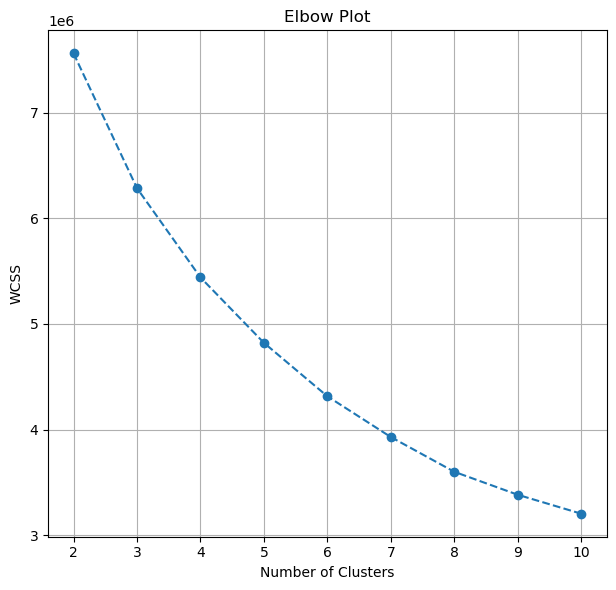

In [42]:
plot_elbow(numeric_data, max_clusters=10)

In [43]:
max_clusters=10
wcss = []  
    
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=42)
    kmeans.fit(numeric_data)
    wcss.append(kmeans.inertia_)

In [44]:
def perform_kmeans_clustering(X, max_clusters=10):
    """
    Performs KMeans clustering
    """
    optimal_num_clusters = 4
    
    # Perform KMeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10,  random_state=42)
    kmeans.fit(X)
    
    cluster_centers = kmeans.cluster_centers_
    
    return kmeans, cluster_centers



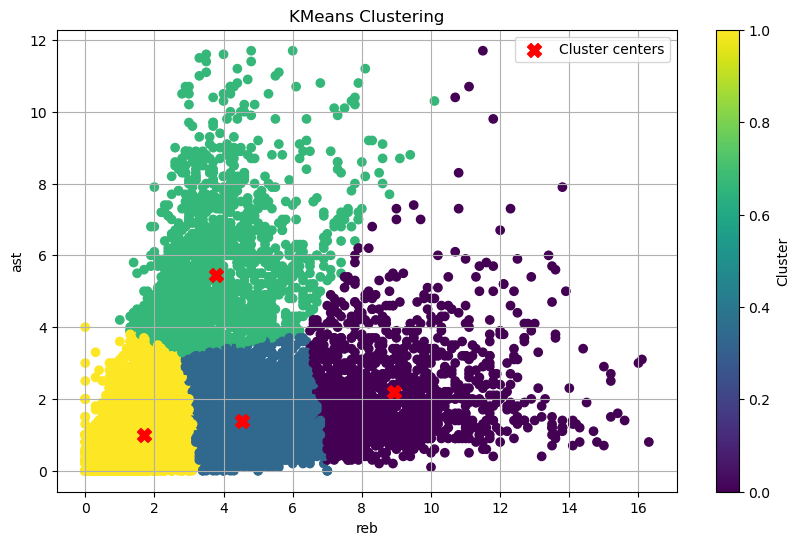

In [40]:
features = ['reb', 'ast']
target = 'pts'

# Perform KMeans clustering
kmeans_model, cluster_centers = perform_kmeans_clustering(nba_data[features])


cluster_labels = kmeans_model.labels_

#plot
plt.figure(figsize=(10, 6))
plt.scatter(nba_data[features[0]], nba_data[features[1]], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=100, c='red', label='Cluster centers')
plt.title('KMeans Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc="upper right")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [50]:
# Select  columns for fitting
data_for_fitting = nba_data[features + [target]].copy()
    

data_for_fitting.dropna(inplace=True)
    
# Split data into features (X) and target variable (y)
X = data_for_fitting[features]
y = data_for_fitting[target]
    
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
def perform_multiple_linear_regression(data, features, target):
    """
    Perform multiple linear regression on NBA data.
    """
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    
    return model, mse

features = ['reb', 'ast', 'player_height']
target = 'pts'

In [52]:
model, mse = perform_multiple_linear_regression(nba_data, features, target)

# Print model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)

Coefficients: [ 1.25607838  1.71579938 -0.0300723 ]
Intercept: 6.624841540799154
Mean Squared Error: 11.909964258797816


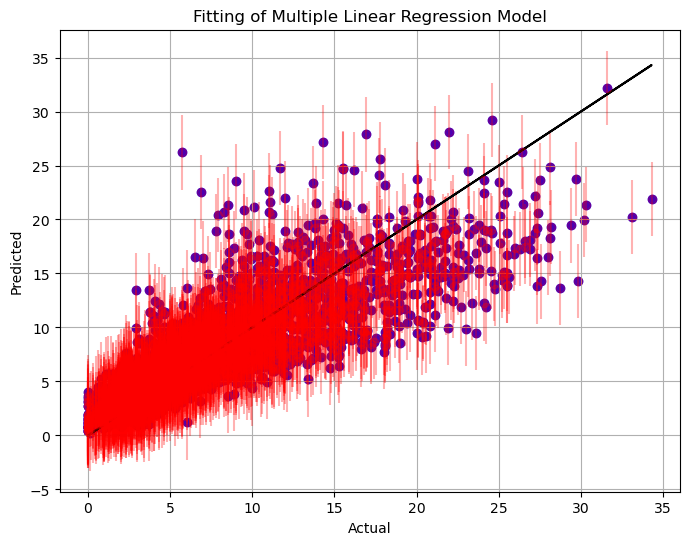

In [53]:
def plot_fitting(actual, predicted):
    """
    Plot the fitting of a model by visualizing the actual versus predicted values.
    """
    residuals = predicted - actual
    std_residuals = np.std(residuals)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, color='blue')
    plt.errorbar(actual, predicted, yerr=std_residuals, fmt='o', color='red',alpha=0.3, label='Data with Error Bars')
    plt.plot(actual, actual, color='black', linestyle='-',alpha=1)  # Plot the diagonal line (y = x)
    plt.title('Fitting of Multiple Linear Regression Model')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

y_test_pred = model.predict(X_test)
plot_fitting(y_test, y_test_pred)